choosing the first node can be tricky because all other decisions are based on it so random forest creates multiple trees and take the mod i.e. the majority.


for the cases such as bank fraud where the case of interest is a very rare event accuray does not give a meaning to analysis. this is because such a model will always almost give positive results. so measures like precision and recall are taken acount account. precision = tp/(tp+fp) where tp=true positive, fp= false positive. Recall=tp/(tp+fn) where fn=false negitive. After finding this the F1 score is found. this is particularly useful for data sets that have very less positive cases. F1 score combines precision and recall. Another useful matric is AUC. AUC is the area under the curve under all test sets. this gives a better insight about how well should our model work for real case scenarios.

In [7]:
#imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
%matplotlib notebook
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import seaborn as sns
import csv
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import random
random.seed(0)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score


In [8]:
DataFile = pd.read_csv('C:/Users/muneeba/Desktop/THESIS/DataDistributionPCA.csv') 
DataFile=DataFile[:65]
DataFile=DataFile.iloc[:,4:10]
DataFile.describe()

,0.2,0.4,0.6,0.8,1,1.2
count,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01
mean,8.477821e-02,8.197989e-02,7.698065e-02,7.017216e-02,6.172612e-02,5.221328e-02
std,1.073161e-01,1.037069e-01,9.746982e-02,8.932636e-02,8.016903e-02,7.149178e-02
min,4.290000e-08,4.170000e-08,3.990000e-08,3.750000e-08,3.470000e-08,3.140000e-08
25%,2.439750e-03,2.357000e-03,2.203250e-03,1.993750e-03,1.721250e-03,1.417000e-03
50%,1.965000e-02,1.895000e-02,1.760000e-02,1.570000e-02,1.390000e-02,1.230000e-02
75%,1.412500e-01,1.357500e-01,1.235000e-01,1.132500e-01,1.075000e-01,8.085000e-02
max,3.290000e-01,3.200000e-01,3.090000e-01,2.970000e-01,2.830000e-01,2.680000e-01


In [9]:
DataFile.head()

,0.2,0.4,0.6,0.8,1,1.2
0,0.189000,0.184000,0.17600,0.166000,0.153000,0.139000
1,0.157000,0.153000,0.14600,0.138000,0.127000,0.115000
2,0.051500,0.050100,0.04790,0.045100,0.041600,0.037700
3,0.006690,0.006510,0.00622,0.005850,0.005400,0.004880
4,0.000579,0.000559,0.00052,0.000465,0.000396,0.000317


In [11]:
data_frame = pd.DataFrame( DataFile)
data_frame['0.2']=data_frame['0.8'] # setting the target
X = data_frame.drop('0.2', axis=1)
print(X.shape)
print(type(X))
Y =np.array([1,0,1,1,1,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0])
pd.DataFrame(Y)

(64, 5)
<class 'pandas.core.frame.DataFrame'>


,0
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,0
8,0
9,0


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4., random_state=0)

In [13]:
model = RandomForestClassifier(max_depth=4, n_estimators=50)
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

Y_train_score = np.max(model.predict_proba(X_train), axis=1)
Y_test_score = np.max(model.predict_proba(X_test), axis=1)

train_mse = sklearn.metrics.mean_squared_error(Y_train, Y_train_pred)
test_mse = sklearn.metrics.mean_squared_error(Y_test, Y_test_pred)
print("Train MSE {}".format(train_mse))
print("Test MSE {}".format(test_mse))

train_accuracy = sklearn.metrics.accuracy_score(Y_train, Y_train_pred)
test_accuracy = sklearn.metrics.accuracy_score(Y_test, Y_test_pred)
print("Train Accuracy {}%".format(train_accuracy*100.0))
print("Test Accuracy {}%".format(test_accuracy*100))

Train MSE 0.10416666666666667
Test MSE 0.4375
Train Accuracy 89.58333333333334%
Test Accuracy 56.25%


In [14]:
print("Test Precision {}".format(sklearn.metrics.precision_score(Y_test, Y_test_pred)))
print("Test Recall {}".format(sklearn.metrics.recall_score(Y_test, Y_test_pred)))

Test Precision 0.75
Test Recall 0.3333333333333333


In [15]:
print("Test f1 Score {}".format(f1_score(Y_test, Y_test_pred)))

Test f1 Score 0.46153846153846156


In [16]:
cf_matrix = confusion_matrix(Y_test, Y_test_pred)
cf_matrix

array([[6, 1],
       [6, 3]], dtype=int64)

(16,)


<IPython.core.display.Javascript object>


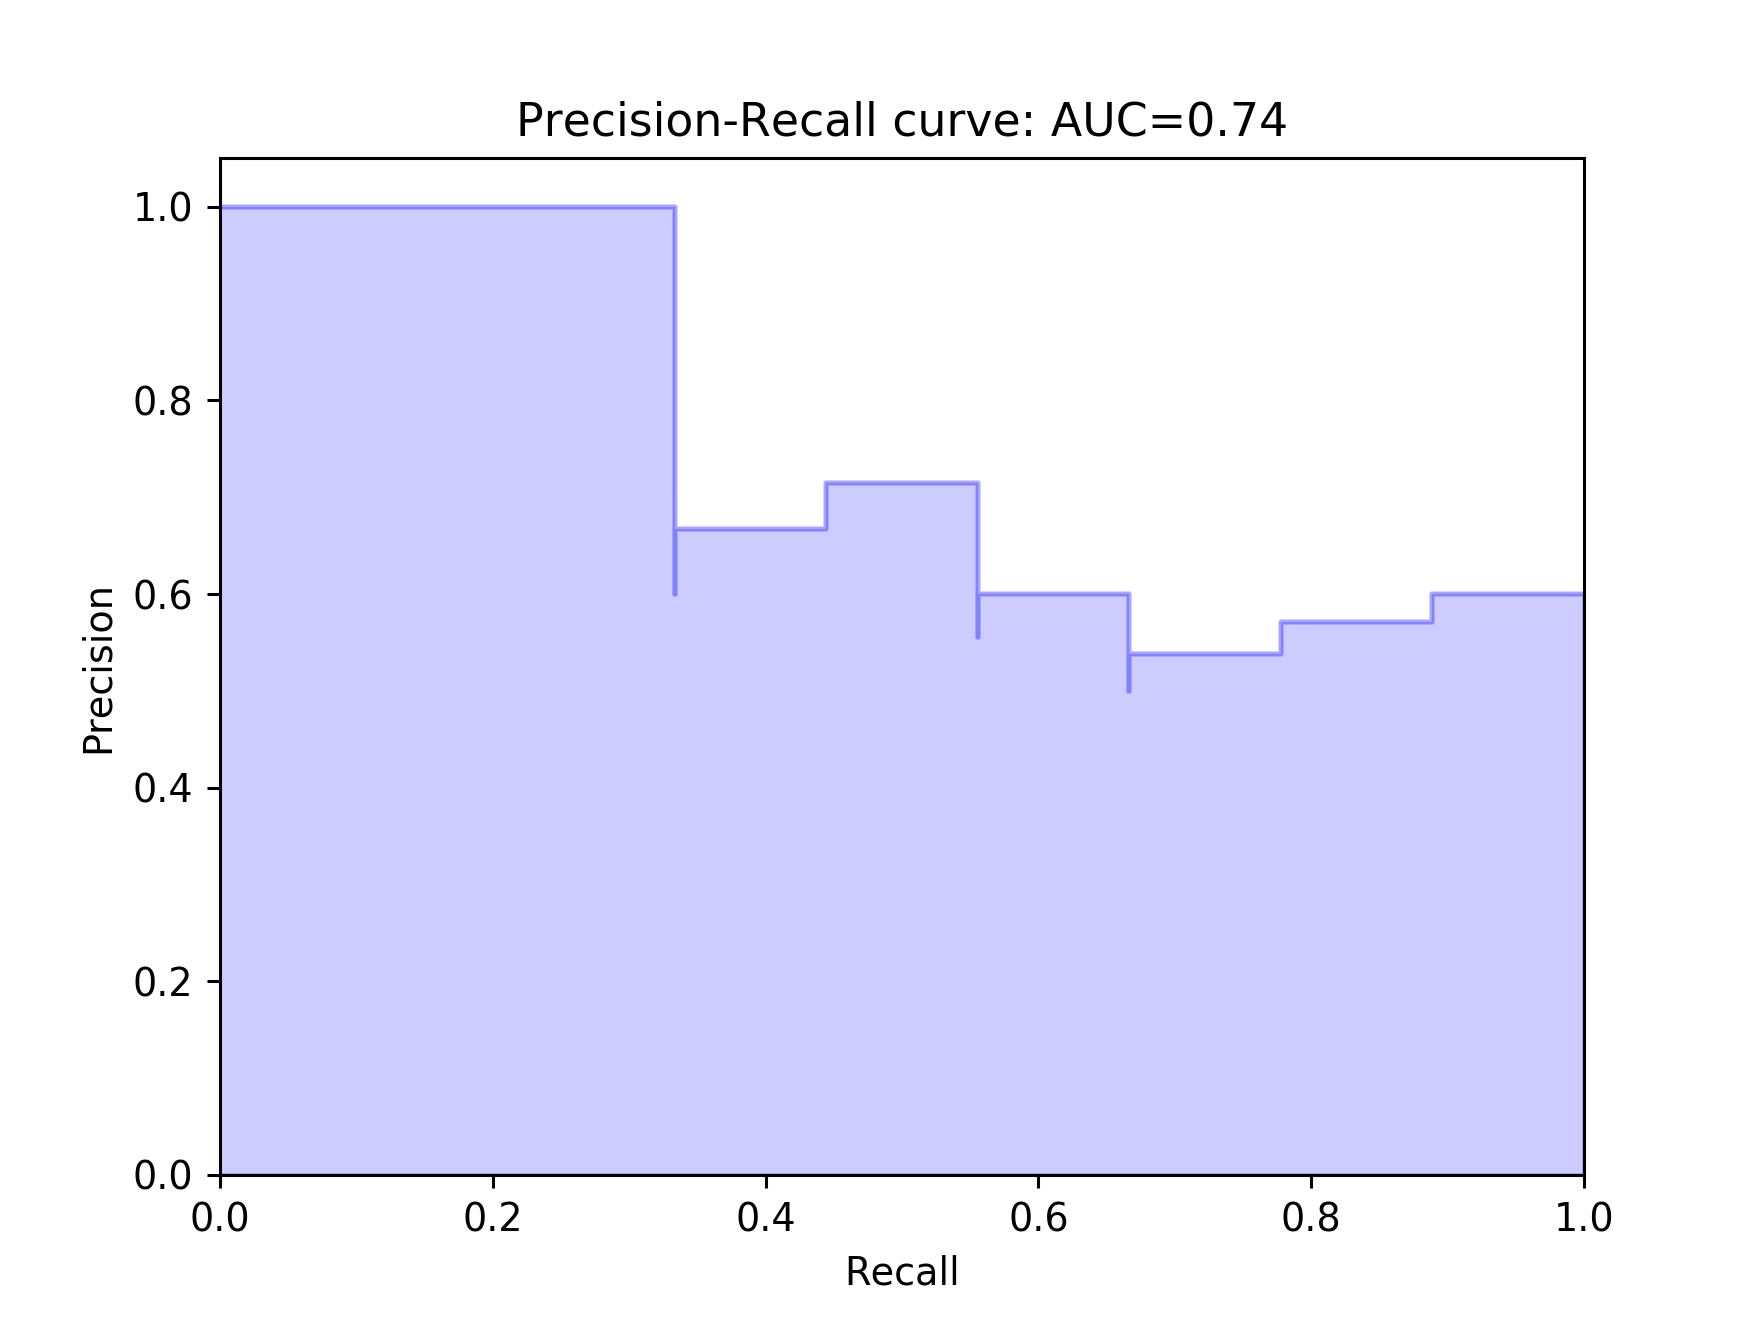

In [17]:
# plot AUC, precision, recall
print(Y_test.shape)
precision, recall, _ = precision_recall_curve(Y_test, Y_test_score)
average_precision = average_precision_score(Y_test, Y_test_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))
plt.show()